In [51]:
import requests
import nltk
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re
import pandas as pd
import string
import matplotlib.pyplot as plt

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...


True

In [10]:
nltk.download('punkt')
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...


True

In [3]:
r = requests.get("https://www.who.int/news-room/fact-sheets/detail/marburg-virus-disease")
r.encoding = 'utf-8'
html = r.text
soup = BeautifulSoup(html, 'html.parser')

In [5]:
paragraphs = ''
for paragraph in soup.find_all('p'):
    paragraphs += paragraph.text

In [7]:
#remove digits in square brackets and new lines
patterns = [r'\[\d+\]', r'\n']
for pattern in patterns:
    paragraphs = re.sub(pattern, '', paragraphs)

In [21]:
def clean_text(text):
    sentences = sent_tokenize(text)
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text =[word for word in text if word not in string.punctuation]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    
    return text, sentences

In [22]:
tokenized_text, sentences = clean_text(paragraphs)

In [53]:

nlp = spacy.load('en_core_web_sm')
doc = nlp(paragraphs)


In [55]:
countries = []
animals = []
for ent in doc.ents:
    if ent.label_ == 'GPE':
        countries.append(ent.text)
    if ent.label_ == 'ANIMAL':
        animals.append(ent.text)
print(countries)
print(animals)

['Marburg', 'Frankfurt', 'Germany', 'Belgrade', 'Serbia', 'Marburg', 'Frankfurt', 'Germany', 'Belgrade', 'Serbia', 'Uganda', 'Angola', 'the Democratic Republic of the', 'Congo', 'Kenya', 'South Africa', 'Zimbabwe', 'Uganda', 'Uganda', 'Marburg', 'Zaire', 'Uganda']
[]


In [25]:
word_counts = Counter(tokenized_text)

In [34]:
most_common_words = word_counts.most_common(10)
print(most_common_words)

[('marburg', 26), ('virus', 26), ('disease', 15), ('outbreak', 13), ('patient', 12), ('infection', 12), ('mvd', 11), ('contact', 11), ('semen', 10), ('practice', 8)]


In [41]:
def plot_10_most_common_words(most_common_words):
    words, counts = list(zip(*most_common_words))
    plt.barh(words, counts)
    plt.show()

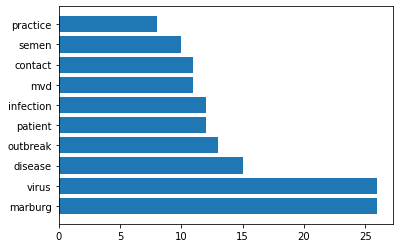

In [42]:
plot_10_most_common_words(most_common_words)

In [50]:
links_in_text = []
relevant_links = []
for link in soup.find_all('a'):
    links_in_text.append(link.get('href'))

for link in links_in_text:
    if re.match(r'^https://', link):
        relevant_links.append(link)
       
print(relevant_links)

['https://www.who.int/', 'https://www.who.int/', 'https://www.afro.who.int/', 'https://www.paho.org/hq/index.php?lang=en', 'https://www.who.int/southeastasia', 'https://www.who.int/europe/', 'https://www.who.int/westernpacific/', 'https://www.who.int/publications-detail-redirect/WHO-HSE-PED-CED-2014.05', 'https://www.who.int/publications-detail-redirect/WHO-HIS-SDS-2014.4-Rev.1', 'https://www.who.int/entity/csr/don/archive/disease/marburg_virus_disease/en/index.html', 'https://www.who.int/topics/haemorrhagic_fevers_viral/en/index.html', 'https://www.who.int/publications-detail-redirect/WHO-HIS-SDS-2014.4-Rev.1', 'https://www.who.int/publications/m/item/standard-precautions-in-health-care', 'https://www.who.int/news/item/09-08-2021-west-africa-s-first-ever-case-of-marburg-virus-disease-confirmed-in-guinea', 'https://www.youtube.com/user/who?sub_confirmation=1', 'https://twitter.com/intent/follow?source=followbutton&variant=1.0&screen_name=who', 'https://www.facebook.com/WHO', 'https://i

['https://www.who.int/', 'https://www.who.int/', '#', 'https://www.afro.who.int/', 'https://www.paho.org/hq/index.php?lang=en', 'https://www.who.int/southeastasia', 'https://www.who.int/europe/', 'http://www.emro.who.int/index.html', 'https://www.who.int/westernpacific/', '/', '/', '/redirect-pages/mega-menu/health-topics', '/health-topics/', '/health-topics/#A', '/health-topics/#B', '/health-topics/#C', '/health-topics/#D', '/health-topics/#E', '/health-topics/#F', '/health-topics/#G', '/health-topics/#H', '/health-topics/#I', '/health-topics/#J', '/health-topics/#K', '/health-topics/#L', '/health-topics/#M', '/health-topics/#N', '/health-topics/#O', '/health-topics/#P', '/health-topics/#Q', '/health-topics/#R', '/health-topics/#S', '/health-topics/#T', '/health-topics/#U', '/health-topics/#V', '/health-topics/#W', '/health-topics/#X', '/health-topics/#Y', '/health-topics/#Z', '/redirect-pages/mega-menu/health-topics/resources', '/redirect-pages/mega-menu/health-topics/resources/fact-